In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

path = "Desktop/data_science_alura/ml-latest-small/"
notas = pd.read_csv("{}ratings.csv".format(path))
filmes = pd.read_csv("{}movies.csv".format(path))

notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


<AxesSubplot:ylabel='rating'>

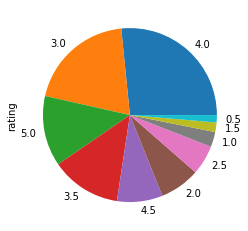

In [2]:
tiposnotas = notas['rating'].value_counts(normalize = True)
tiposnotas.plot.pie()

<AxesSubplot:ylabel='Frequency'>

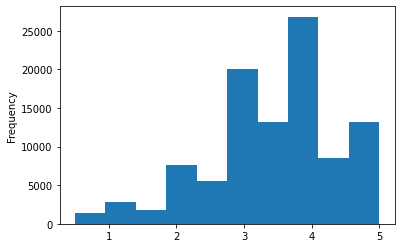

In [3]:
notas.rating.plot(kind = 'hist')

In [4]:
media = notas.rating.mean()
mediana = notas.rating.median()

print("Média: {} \nMediana: {}".format(media, mediana))

Média: 3.501556983616962 
Mediana: 3.5


In [5]:
notas.rating.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

c:\users\cesar.noronha\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating'>

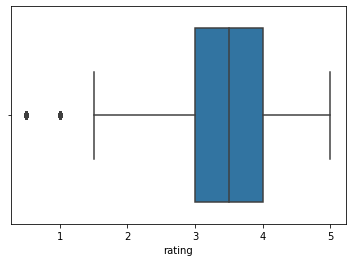

In [6]:
sns.boxplot(notas['rating'])

In [7]:
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
Toy_Story = notas.query("movieId == 1")
Toy_Story.rating.mean()

3.9209302325581397

<AxesSubplot:ylabel='rating'>

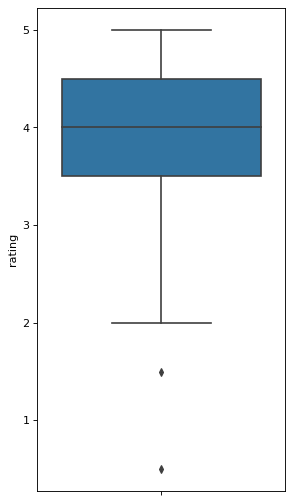

In [9]:
figure(figsize=(4, 8), dpi=80)

sns.boxplot(y = Toy_Story.rating)

In [10]:
notas.groupby("movieId")
notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [11]:
medias_por_filme = notas.groupby("movieId").mean().rating
medias_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

<AxesSubplot:>

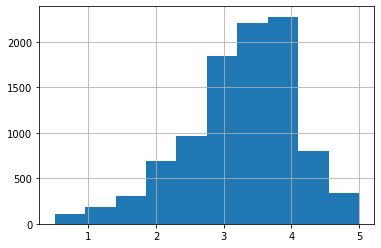

In [12]:
medias_por_filme.hist(bins = 10)

In [13]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: rating, dtype: float64

c:\users\cesar.noronha\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

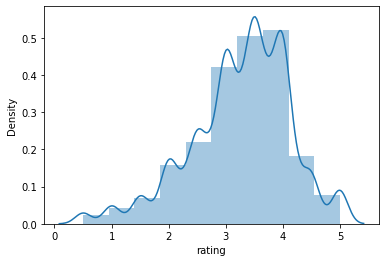

In [14]:
sns.distplot(medias_por_filme, bins=10)

In [15]:
notas_do_toy_story = notas.query("movieId==1")
notas_do_jumanji = notas.query("movieId==2")
notas_do_toy_story

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [16]:
print(len(notas_do_toy_story),len(notas_do_jumanji))

215 110


In [17]:
print("nota media de toy story é {}".format(notas_do_toy_story.rating.mean()))
print("nota media de jumanji é {}".format(notas_do_jumanji.rating.mean()))

print("nota media de toy story é %.2f" % notas_do_toy_story.rating.mean())
print("nota media de jumanji é %.2f" % notas_do_jumanji.rating.mean())

nota media de toy story é 3.9209302325581397
nota media de jumanji é 3.4318181818181817
nota media de toy story é 3.92
nota media de jumanji é 3.43


In [18]:
print("nota media de toy story é %.2f" % notas_do_toy_story.rating.median())
print("nota media de jumanji é %.2f" % notas_do_jumanji.rating.median())

nota media de toy story é 4.00
nota media de jumanji é 3.50


{'whiskers': [<matplotlib.lines.Line2D at 0x214e55d5f70>,
 'caps': [<matplotlib.lines.Line2D at 0x214e55e6670>,
 'boxes': [<matplotlib.lines.Line2D at 0x214e55d5be0>,
 'medians': [<matplotlib.lines.Line2D at 0x214e55e6d90>,
 'fliers': [<matplotlib.lines.Line2D at 0x214e55f2160>,
 'means': []}

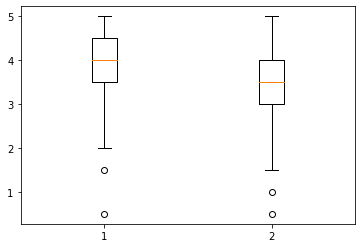

In [19]:
plt.boxplot([notas_do_toy_story.rating, notas_do_jumanji.rating])

<AxesSubplot:xlabel='movieId', ylabel='rating'>

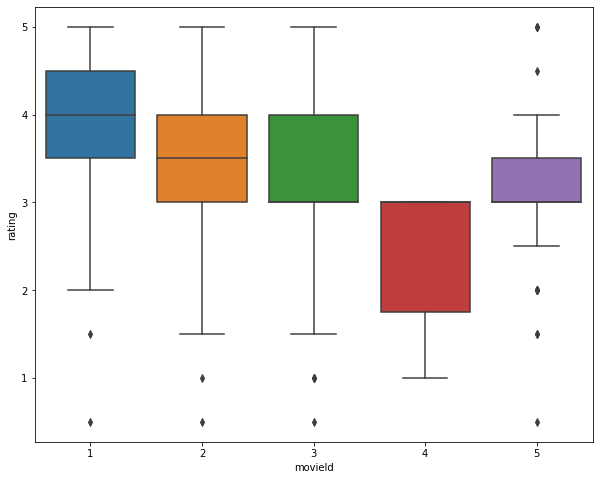

In [28]:
plt.figure(figsize=(10,8))
sns.boxplot(y='rating', x='movieId', data=notas.query('movieId < 6')) # or "movieId in [1, 2,3,4,5"]))